# Boosting Algorithms
---

Firstly, lets discuss the three B's:

* **Bootstraping**
* **Bagging** 
* **Boosting**


Many of the **Ensembale Learing** algorithms are based on this three B's.  

### • Bootstraping

<img src="https://hudsonthames.org/wp-content/uploads/2019/09/bagging-1.png" width=410>

Bootstraping is a simple concept used as building blocks of more advanced algorithms, like *AdaBoost* and *XGBoost*.  

Bootstraping refers to ***bootstrap sampling***. This is resampling method that uses random sampling method *with Replacement*. The term "with Replacement" means that and observabale can be chosen again.

### • Bagging

<img src="https://miro.medium.com/max/786/1*zTgGBTQIMlASWm5QuS2UpA.jpeg" width=400>

Bagging - also called ***Bootstrap Aggregating*** - builds off of bootstraping.
Bootstrap aggregating is the process of using bootstrap samples of a dataset, by which *multiple models of the same algorithm* are trained. 

## • Boosting

In Boosting each individual model is built sequentially by iterating over the previous model. Which means that data points that are falsely classified by the previous model **are emphasized** in the next model. So the accuracy of the model should increases.

$$ *-*-* $$

## Ada-Boost
---

AdaBoost algorithm, short term of Adaptive Boosting, is a boosting ensemble algorithm. Because the *weights are reassigned*, it is called Adaptive. *The higher weights are assigned to misclassified instances*. Thus the next classifier will have a bias toward that instances.  

Basically, Adaboost is some stump weak learners which become strong based on the weights, and the number of stumps.  
And the 


### DATA

***IMPORTANT:***  
In this dataset we are trying to use machine learning to help us not just predict sth, but also a general feature guidline for people who are picking mushrooms...

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../DATA/mushrooms.csv')

In [5]:
df.head(3)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [9]:
df.describe().transpose()

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [10]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

### TRAIN|TEST Split

In [13]:
X = df.drop('class', axis=1)
X = pd.get_dummies(X, drop_first=True)

In [14]:
y = df['class']

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.15, random_state=101)

### AdaBoost Model

In [16]:
from sklearn.ensemble import AdaBoostClassifier

In [26]:
model = AdaBoostClassifier(base_estimator=None,
                           n_estimators=1,
                           learning_rate=1.0,
                           algorithm='SAMME.R',)

In [27]:
model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=1)

In [29]:
model.estimator_errors_

array([0.11165822])

In [33]:
model.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [35]:
model.feature_importances_.argmax()

22

In [37]:
model.feature_names_in_[22]

'odor_n'

So The most Important Feature to classify an Edible vs Poisonous Mushroom is **Odor n**, based on AdaBoost Model.

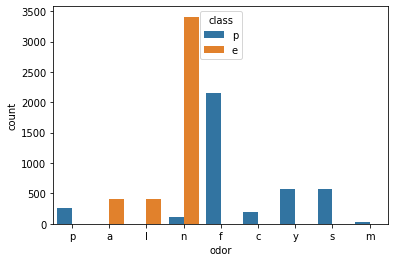

In [42]:
sns.countplot(data=df, x='odor', hue='class');

### Evaluation

In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [44]:
y_pred = model.predict(X_test)

In [45]:
confusion_matrix(y_test, y_pred)

array([[529, 126],
       [ 23, 541]], dtype=int64)

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           e       0.96      0.81      0.88       655
           p       0.81      0.96      0.88       564

    accuracy                           0.88      1219
   macro avg       0.88      0.88      0.88      1219
weighted avg       0.89      0.88      0.88      1219



### Using More Weak Learners

In [49]:
errs = []

for i in range(1,50):
    
    model = AdaBoostClassifier(n_estimators=i)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    err = 1 - accuracy_score(y_test, y_pred)
    errs.append(err)

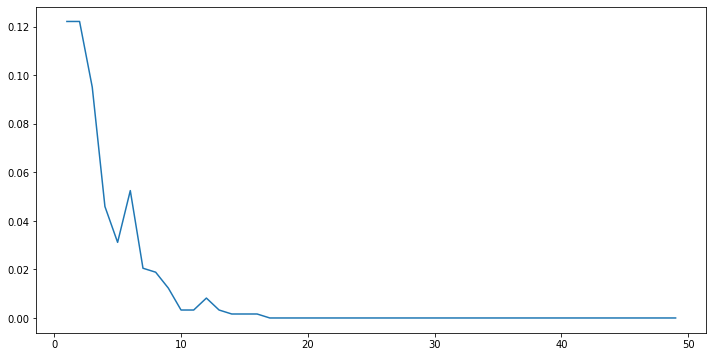

In [51]:
plt.figure(figsize=(12,6))

plt.plot(list(range(1,50)), errs);

It's obvious after 20 number of stumps we reach the threshold

In [60]:
cols = pd.DataFrame(data=model.feature_importances_, index=model.feature_names_in_, columns=['Imp'])
cols

,Imp
cap-shape_c,0.000000
cap-shape_f,0.000000
cap-shape_k,0.000000
cap-shape_s,0.000000
cap-shape_x,0.000000
...,...
habitat_l,0.000000
habitat_m,0.000000
habitat_p,0.000000
habitat_u,0.000000


In [66]:
cols[ cols["Imp"]>0 ].sort_values('Imp')

,Imp
cap-color_c,0.020408
ring-number_t,0.020408
stalk-surface-below-ring_y,0.020408
odor_p,0.020408
habitat_w,0.020408
cap-color_w,0.020408
cap-color_n,0.020408
odor_f,0.040816
odor_n,0.040816
bruises_t,0.040816


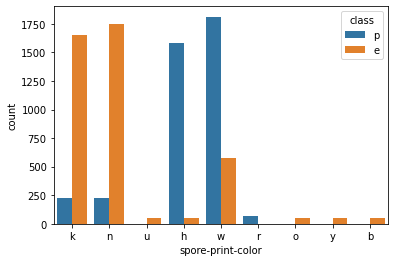

In [68]:
sns.countplot(data=df, x='spore-print-color', hue='class');

---
---
---
$$*---*---*$$

## Gradient Boosting
---

Gradient Tree Boosting or Gradient Boosted Decision Trees (GBDT) is a generalization of boosting to arbitrary differentiable loss functions. GBDT is an accurate and effective off-the-shelf procedure that can be used for both regression and classification problems in a variety of areas including Web search ranking and ecology.

What GBDT mostly does is that it reduces the error of the previous model.

### DATA

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

### GBDT with GridSearch

In [72]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [73]:
model = GradientBoostingClassifier(loss='deviance',
                                   learning_rate=0.1,
                                   n_estimators=100,
                                   max_depth=3)

In [79]:
params = {
    'loss':['deviance', 'exponential'],
    'learning_rate':[0.01,0.1,0.5,1],
    'n_estimators':[50,100,200],
    'max_depth':[2,3,4]
}

In [80]:
grid = GridSearchCV(model, params)

In [81]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.5, 1],
                         'loss': ['deviance', 'exponential'],
                         'max_depth': [2, 3, 4],
                         'n_estimators': [50, 100, 200]})

In [82]:
grid.best_params_

{'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 3, 'n_estimators': 100}

In [92]:
cols = pd.DataFrame(data=grid.best_estimator_.feature_importances_, index=grid.feature_names_in_, columns=['Imp'])

In [98]:
cols[cols['Imp']>0.0005].sort_values('Imp', ascending=False)

,Imp
odor_n,0.614744
stalk-root_c,0.136011
bruises_t,0.051381
stalk-surface-below-ring_y,0.051120
spore-print-color_r,0.030495
odor_l,0.018250
stalk-root_r,0.018111
odor_f,0.017262
gill-spacing_w,0.012528
gill-size_n,0.011359
